# Task 3  Un-Supervised ML on Iris Dataset 

We only have features, and we find patterns in features.

### Clustering

A group of objects that are **similar to other objects** in the cluster, and **dissimilar to data points** in other clusters.

<hr>

#### Importing all required Libraries

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

##### loading dataset  `IRIS`

In [42]:
data_iris = datasets.load_iris()

In [116]:
label = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [61]:
data = pd.DataFrame(data_iris.data, columns= ["sepal_length", "sepal_width", "petal_length", "petal_width"])

In [62]:
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
data.shape

(150, 4)

In [193]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [195]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [154]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.labelsize'] = 10

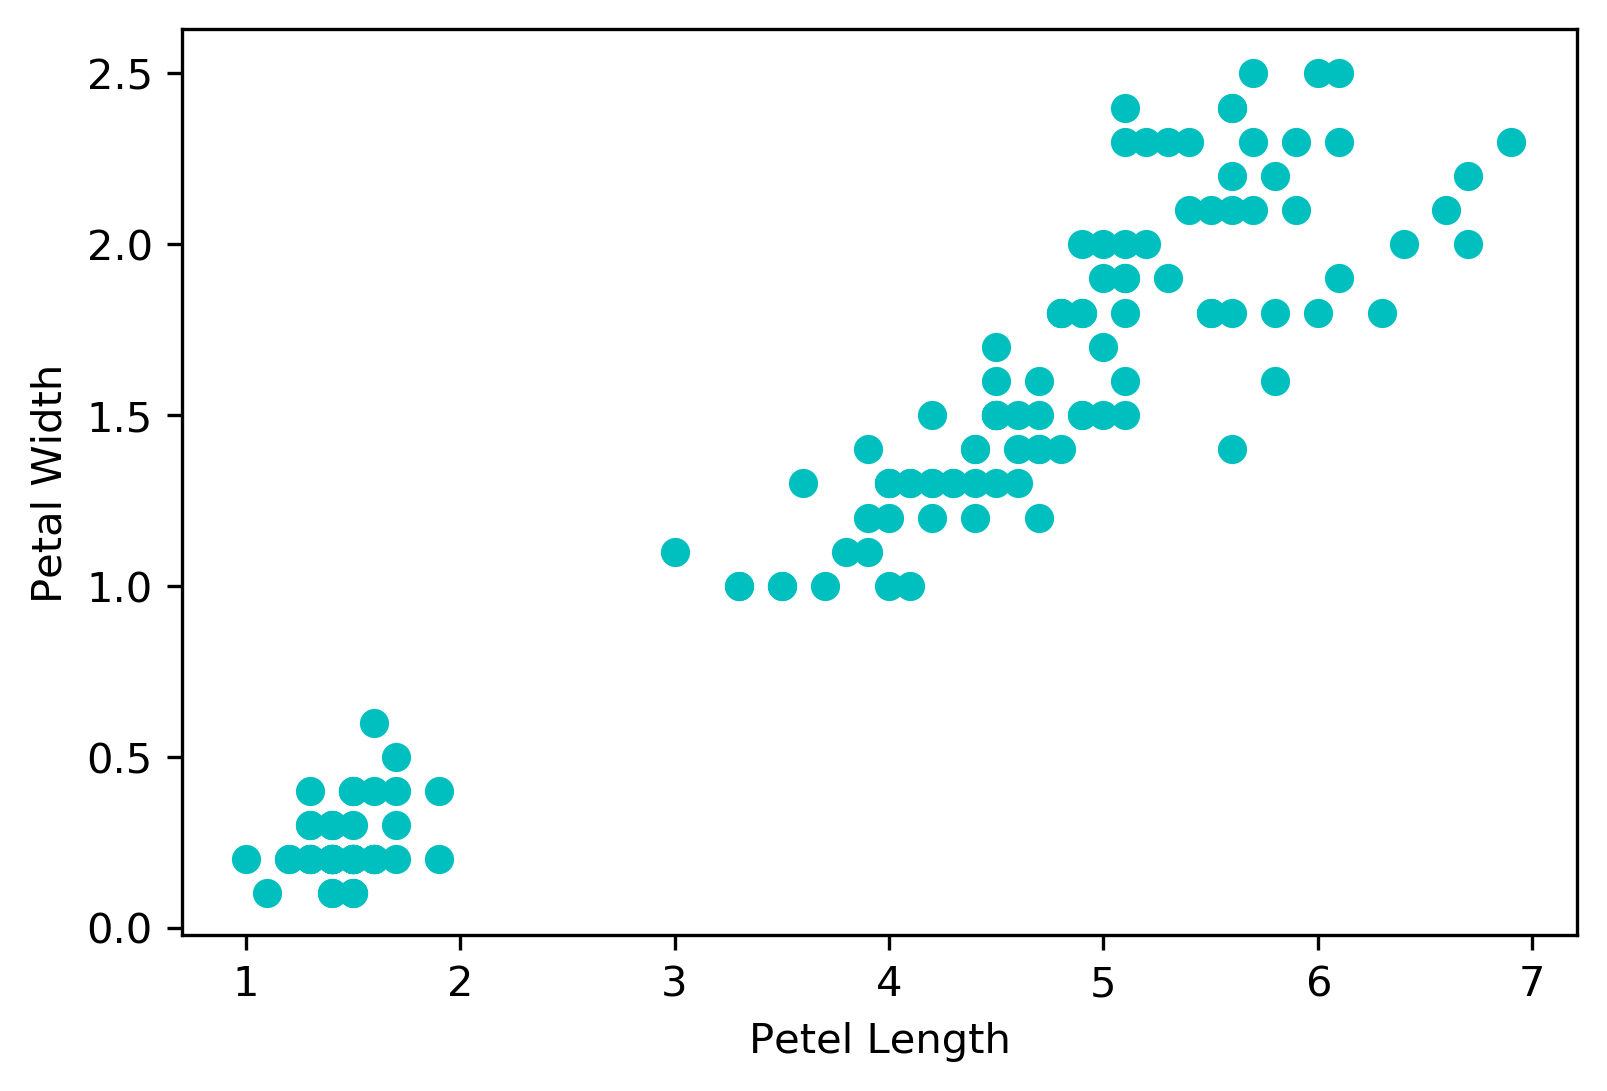

In [88]:
for i in range(0, data.shape[0]):
    plt.scatter(data["petal_length"][i], data["petal_width"][i], data = data, c="c"
               )
plt.xlabel("Petel Length")
plt.ylabel("Petal Width")
plt.show()

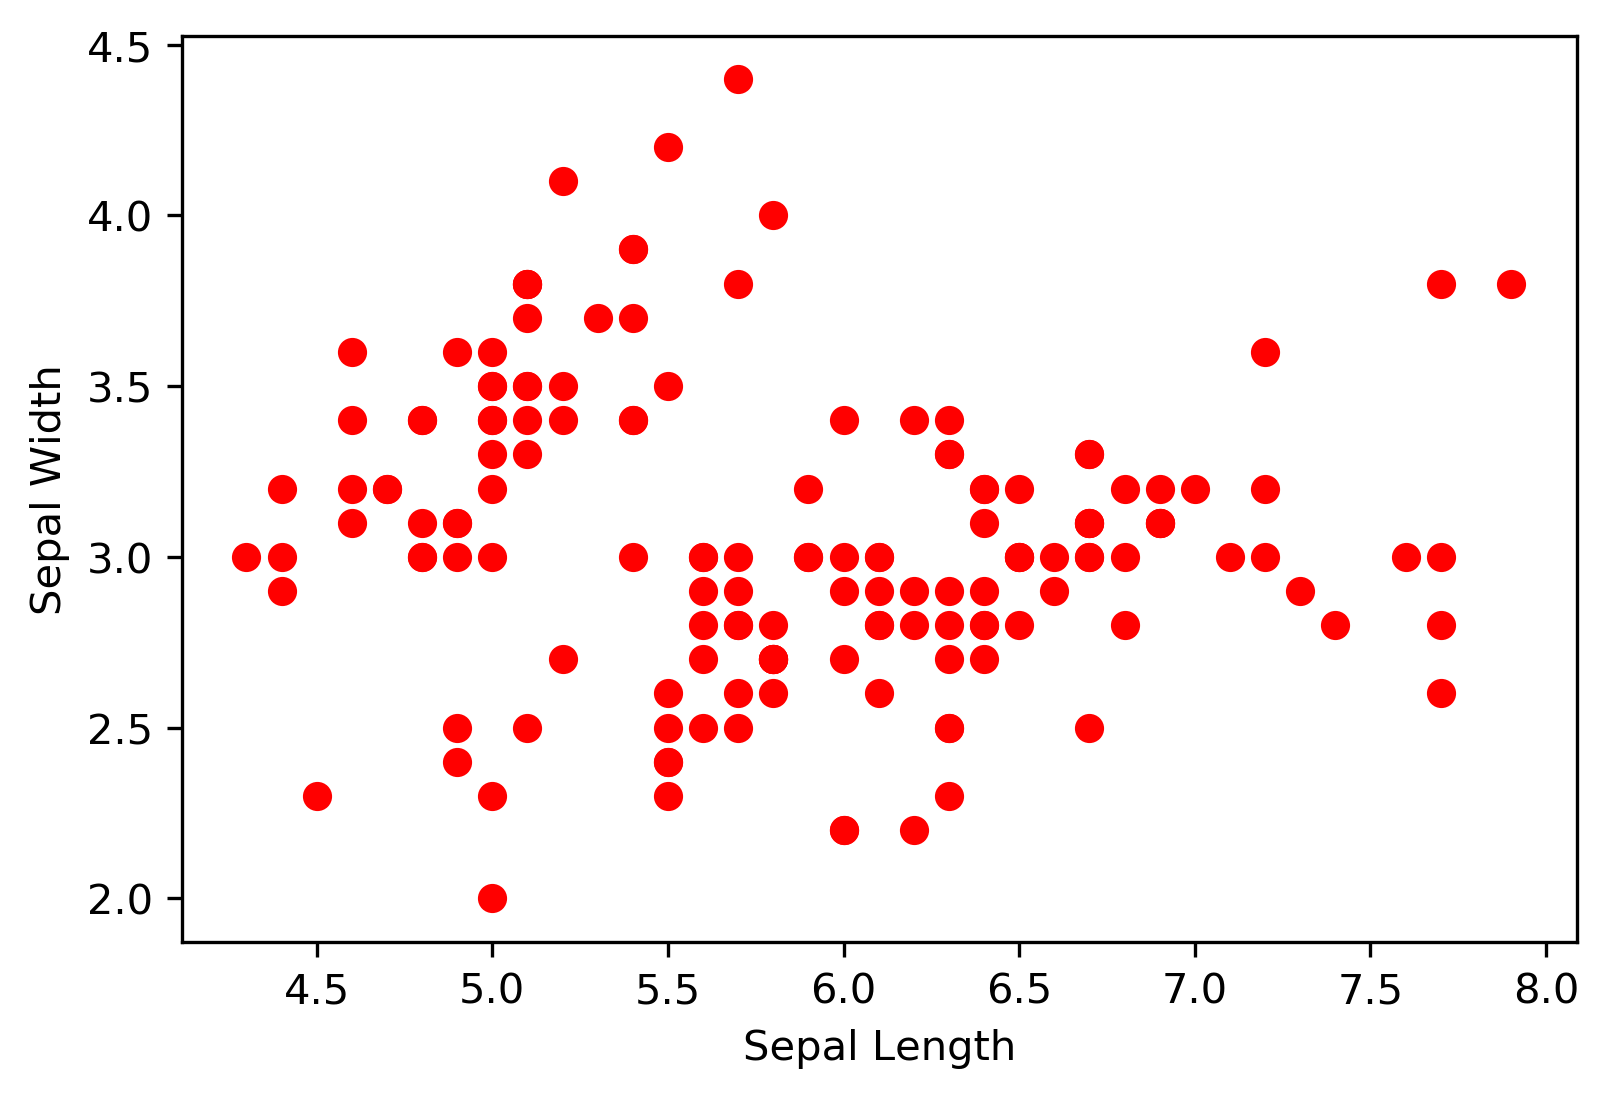

In [200]:
for i in range(0, data.shape[0]):
    plt.scatter(data["sepal_length"][i], data["sepal_width"][i], data = data, color="r")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

<hr>

### K-Means Clustering Algorithm

`Step1` : Decide Number of Clusters (K)

`Step2` : Initilize you cluster centroids (Random or Custom)

`Step3` : Assign each data point (object) to its closest centroid, creating a cluster

`Step4` : Recalculate the position of the k centroids.

`Step5` : Repeat the steps 3-4, until the centroids no longles move or algorithm converge

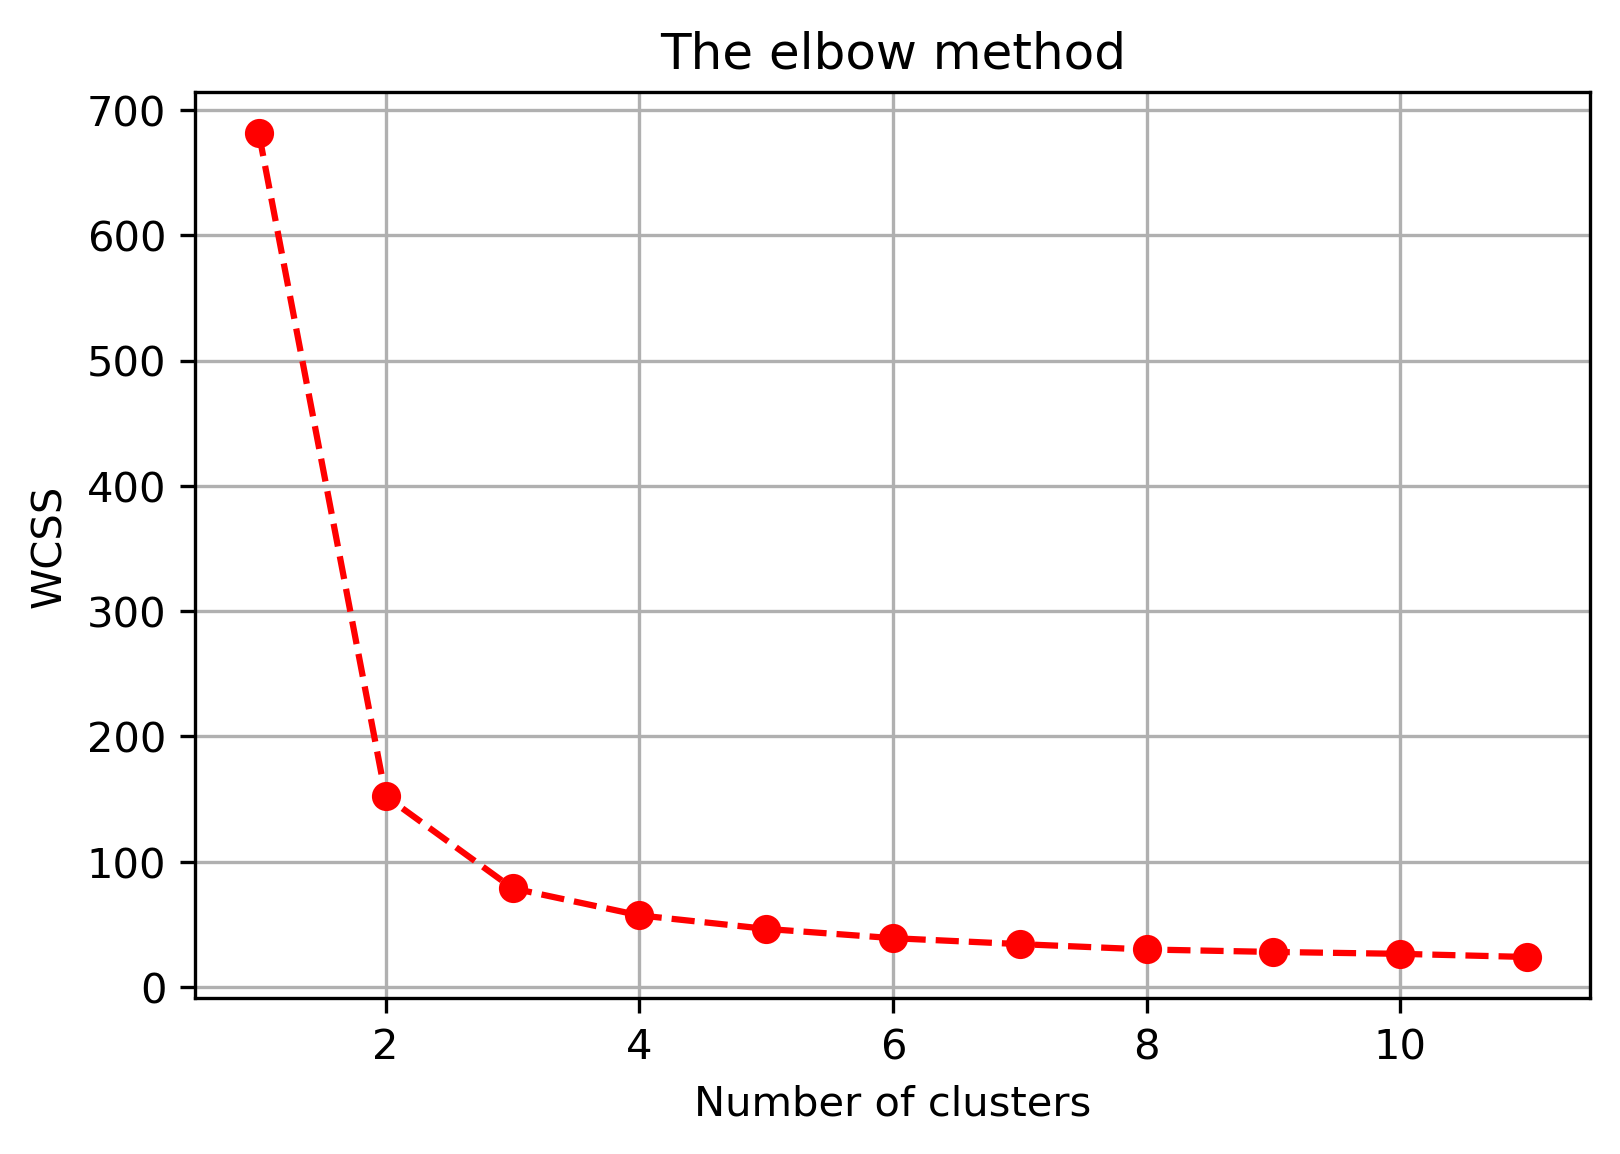

In [189]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0, 1, 2, 3]].values


wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 12), wcss, "--ro")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

`The Elbow method`: In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

From this we choose the number of clusters as **3**.

<hr>

#### Normalizing the Features

In [98]:
features = data_iris.data

In [107]:
nor_features = preprocessing.normalize(features)


In [108]:
nor_features

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [171]:
t = data_iris.target

In [127]:
X_train, X_test, y_train, y_test = train_test_split(nor_features,t
                                                   , test_size=0.1,  random_state=101)
                                                  

In [172]:
print(len(X_train), len(nor_features))

135 150


In [167]:
model = KMeans(n_clusters=3)
y_predict = model.fit_predict(X_train)


In [159]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [160]:
centers = model.cluster_centers_

In [161]:
centers

array([[0.70495129, 0.32178747, 0.59235975, 0.21499323],
       [0.80113979, 0.5472692 , 0.23440877, 0.03917808],
       [0.75290517, 0.34920791, 0.53149597, 0.16393735]])

In [144]:
X_train

array([[0.76741698, 0.34773582, 0.51560829, 0.15588157],
       [0.72992443, 0.39103094, 0.53440896, 0.16944674],
       [0.73446047, 0.37367287, 0.5411814 , 0.16750853],
       [0.78609038, 0.57170209, 0.23225397, 0.03573138],
       [0.69385414, 0.29574111, 0.63698085, 0.15924521],
       [0.76521855, 0.33391355, 0.52869645, 0.15304371],
       [0.79837025, 0.55735281, 0.22595384, 0.03012718],
       [0.72337118, 0.34195729, 0.57869695, 0.15782644],
       [0.76945444, 0.35601624, 0.50531337, 0.16078153],
       [0.75728103, 0.3542121 , 0.52521104, 0.15878473],
       [0.75911707, 0.3931142 , 0.48800383, 0.17622361],
       [0.76986879, 0.35413965, 0.5081134 , 0.15397376],
       [0.67767924, 0.32715549, 0.59589036, 0.28041899],
       [0.82647451, 0.4958847 , 0.26447184, 0.03305898],
       [0.86093857, 0.44003527, 0.24871559, 0.0573959 ],
       [0.68619022, 0.31670318, 0.61229281, 0.232249  ],
       [0.74714194, 0.33960997, 0.54337595, 0.17659719],
       [0.70610474, 0.3258945 ,

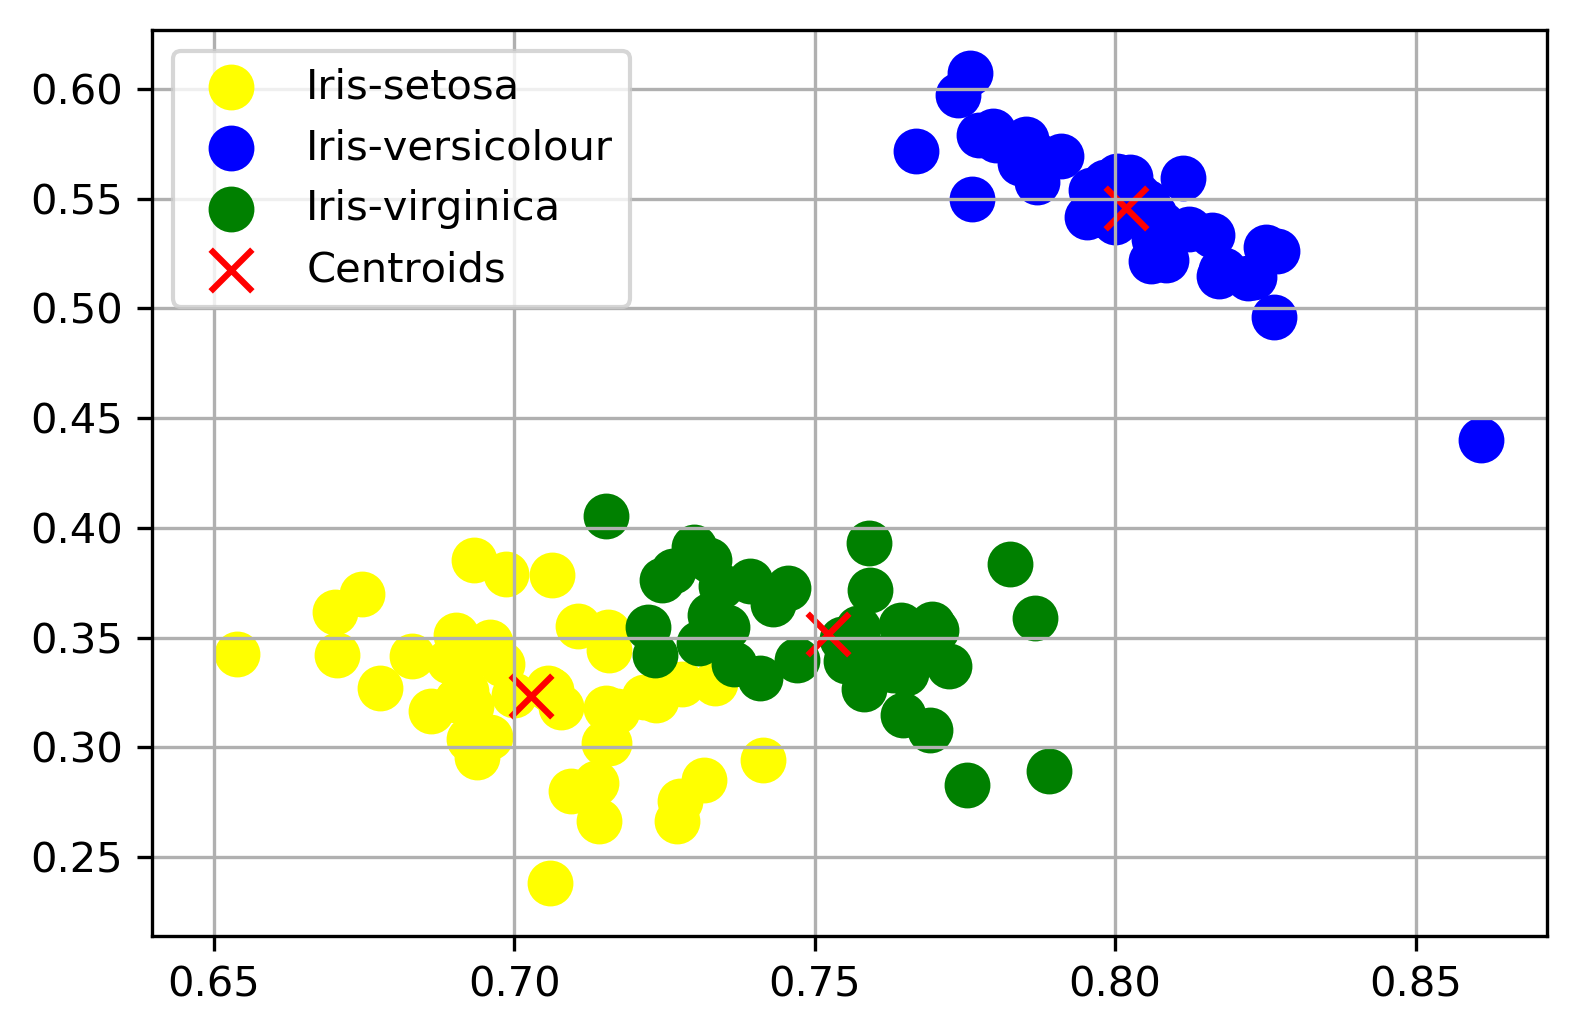

In [168]:
# Visualising the clusters

plt.scatter(X_train[y_predict == 0, 0], X_train[y_predict == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X_train[y_predict == 1, 0], X_train[y_predict == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_train[y_predict == 2, 0], X_train[y_predict == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids', marker="x")
plt.grid()

plt.legend()

<hr>

#### Checking the accuracy of our model 

In [190]:
from sklearn.metrics import silhouette_score 

In [191]:
s = silhouette_score(X_train,y_predict)

In [192]:
s

0.5876166884986503

<hr>

**Here** we complete the the classification of `Un-supervised ML on Iris` data-set and from the above graph we can conlude that with normalizing the features we get better accurate results as shown in silhouette score

<hr>